In [1]:
###: Loading H2O Library

In [2]:
import h2o

In [3]:
###: Get H2O Version

In [4]:
h2o.__version__

u'3.14.0.7'

In [5]:
###: Initalizing H2O cluster

In [6]:
h2o.init()

ERROR:h2o:Key init.version_check is not a valid config key


Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O cluster uptime:,2 days 4 hours 41 mins
H2O cluster version:,3.14.0.7
H2O cluster version age:,1 month and 2 days
H2O cluster name:,H2O_from_python_avkashchauhan_d7ekmq
H2O cluster total nodes:,1
H2O cluster free memory:,2.578 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"
H2O connection url:,http://localhost:54321
H2O connection proxy:,None


In [7]:
###: Importing both training and test dataset into H2O cluster memory

In [8]:
df = h2o.import_file("https://raw.githubusercontent.com/Avkash/mldl/master/data/titanic_list.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
### Understanding the dataset

In [10]:
df.describe()

Rows:1309
Cols:14




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
type,int,int,string,enum,real,int,int,int,real,enum,enum,int,int,enum
mins,1.0,0.0,NaN,,0.1667,0.0,0.0,680.0,0.0,,,1.0,1.0,
mean,2.294881589,0.381970970206,NaN,,29.8811345124,0.498854087089,0.385026737968,249039.136886,33.2954792813,,,9.40452261307,160.809917355,
maxs,3.0,1.0,NaN,,80.0,8.0,9.0,3101298.0,512.3292,,,16.0,328.0,
sigma,0.83783601897,0.486055170866,NaN,,14.4134996999,1.0416583906,0.86556027535,442685.317677,51.7586682392,,,4.3574169836,97.696921996,
zeros,0,809,0,,0,891,1002,0,17,,,0,0,
missing,0,0,0,0,263,0,0,352,1,1014,2,911,1188,564
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160.0,211.3375,B5,S,2.0,nan,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.55,C22 C26,S,11.0,nan,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781.0,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"


In [11]:
###: Listing all columns

In [12]:
df.col_names

[u'pclass',
 u'survived',
 u'name',
 u'sex',
 u'age',
 u'sibsp',
 u'parch',
 u'ticket',
 u'fare',
 u'cabin',
 u'embarked',
 u'boat',
 u'body',
 u'home.dest']

In [13]:
###: Setting response variable

In [14]:
response = "survived"

In [15]:
###: Setting response variable to enum or categorical so we can build a classification model

In [16]:
df[response] = df[response].asfactor()

In [17]:
###: Spliting the dataset into train and test 

In [18]:
train_df, test_df = df.split_frame(ratios=[0.9])

In [19]:
print(train_df.shape)
print(test_df.shape)

(1180, 14)
(129, 14)


In [20]:
###: Understanding Training dataset

In [21]:
train_df.describe()

Rows:1180
Cols:14




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
type,int,enum,string,enum,real,int,int,int,real,enum,enum,int,int,enum
mins,1.0,,NaN,,0.1667,0.0,0.0,680.0,0.0,,,1.0,1.0,
mean,2.29661016949,,NaN,,29.8622502629,0.490677966102,0.396610169492,253096.063232,33.480837659,,,9.46260387812,160.6,
maxs,3.0,,NaN,,80.0,8.0,9.0,3101298.0,512.3292,,,16.0,328.0,
sigma,0.838121835369,,NaN,,14.5459152756,1.0159447475,0.888330929957,454937.541905,52.4386308346,,,4.34285657154,99.1880060817,
zeros,0,,0,,0,803,898,0,16,,,0,0,
missing,0,0,0,0,229,0,0,326,1,911,1,819,1070,506
0,1.0,1,"Allen, Miss. Elisabeth Walton",female,29.0,0.0,0.0,24160.0,211.3375,B5,S,2.0,nan,"St Louis, MO"
1,1.0,1,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781.0,151.55,C22 C26,S,11.0,nan,"Montreal, PQ / Chesterville, ON"
2,1.0,0,"Allison, Miss. Helen Loraine",female,2.0,1.0,2.0,113781.0,151.55,C22 C26,S,nan,nan,"Montreal, PQ / Chesterville, ON"


In [22]:
###: Understanding Test dataset

In [23]:
test_df.describe()

Rows:129
Cols:14




,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
type,int,enum,string,enum,real,int,int,int,real,enum,enum,int,int,enum
mins,1.0,,NaN,,0.6667,0.0,0.0,694.0,0.0,,,2.0,43.0,
mean,2.27906976744,,NaN,,30.0701757895,0.573643410853,0.279069767442,215402.097087,31.6013899225,,,8.83783783784,162.909090909,
maxs,3.0,,NaN,,74.0,8.0,2.0,3101296.0,263.0,,,16.0,299.0,
sigma,0.838308790308,,NaN,,13.0829898691,1.254835608,0.612075671716,323479.18896,45.2176561793,,,4.51856364539,85.40427922,
zeros,0,,0,,0,88,104,0,1,,,0,0,
missing,0,0,0,0,34,0,0,26,0,103,1,92,118,58
0,1.0,0,"Andrews, Mr. Thomas Jr",male,39.0,0.0,0.0,112050.0,0.0,A36,S,nan,nan,"Belfast, NI"
1,1.0,1,"Beckwith, Mr. Richard Leonard",male,37.0,1.0,1.0,11751.0,52.5542,D35,S,5.0,nan,"New York, NY"
2,1.0,0,"Blackwell, Mr. Stephen Weart",male,45.0,0.0,0.0,113784.0,35.5,T,S,nan,nan,"Trenton, NJ"


In [24]:
###: Training and test dataset - columns and rows details

In [25]:
print(train_df.shape)
print(test_df.shape)

(1180, 14)
(129, 14)


In [26]:
###: Training and Test Dataframes - columns names

In [27]:
print(train_df.col_names)
print(test_df.col_names)

[u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']
[u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']


In [28]:
###: Settings all features for supervised machine learning

In [29]:
features = train_df.col_names
print(features)

[u'pclass', u'survived', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']


In [30]:
###: Creating a list of all features we will use for machine learning

In [31]:
features.remove(response)
print(features)

[u'pclass', u'name', u'sex', u'age', u'sibsp', u'parch', u'ticket', u'fare', u'cabin', u'embarked', u'boat', u'body', u'home.dest']


In [32]:
###: Ignoring other features which are not needed for training

In [33]:
for feature_name in ['name', 'ticket', 'home.dest']:
    features.remove(feature_name)
print(features)    

[u'pclass', u'sex', u'age', u'sibsp', u'parch', u'fare', u'cabin', u'embarked', u'boat', u'body']


In [34]:
###: Understanding response variable values as historgram in Training data

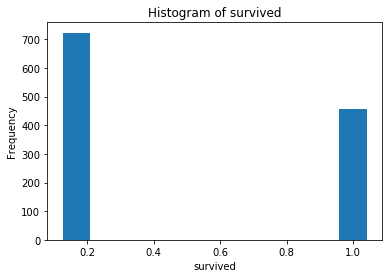

In [35]:
train_df[response].asnumeric().hist()

In [38]:
###: Importing H2O H2OGradientBoostingEstimator to build GBM Model

In [37]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

In [51]:
###:Building Gradient Boosting (GBM) -  Classification model with cross validation

In [52]:
gbm_model_with_cv = H2OGradientBoostingEstimator(nfolds=5)

In [53]:
###: Training the model

In [54]:
gbm_model_with_cv.train(x = features, y = response, training_frame=train_df)

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [55]:
###: Getting model performance

In [56]:
gbm_model_with_cv.model_performance(valid=True,test_data=test_df).auc()

0.9878312601406165

In [57]:
###:Building GBM classification model with cross validation and key GBM parameters configuration

In [58]:
gbm_model_cv_config = H2OGradientBoostingEstimator(nfolds=5,
                                                    keep_cross_validation_predictions=True,
                                                    fold_assignment="auto",
                                                    seed=12345)

In [59]:
###: Training GBM Model

In [60]:
gbm_model_cv_config.train(x = features, y = response, 
                                            training_frame=train_df, 
                                           model_id = "gbm_model_with_training_and_validtion_python")

gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [61]:
###: Getting GBM model performance on test data

In [62]:
gbm_model_cv_config.model_performance(valid=True,test_data=test_df).auc()

0.9878312601406165

In [63]:
###: Importing H2O Grid Library

In [64]:
from h2o.grid import H2OGridSearch

In [65]:
###: Settings GBM grid parameters

In [66]:
gbm_hyper_params = {"learn_rate": [0.01, 0.05, 0.1, 0.2, 0.5, 1.0],
                "max_depth": [ 5, 7, 10],
                "sample_rate": [0.5, 0.75, 1.0],
                "col_sample_rate": [0.5, 0.6, 0.7, 0.8]}

In [67]:
###: Setting H2O Grid Search Criteria

In [68]:
grid_search_criteria = { 'strategy': "RandomDiscrete", 
                    'seed': 123,
                    'stopping_metric': "AUTO", 
                    'stopping_tolerance': 0.01,
                    'stopping_rounds': 5 }

In [69]:
###: Finalzing the H2O Grid searching settings

In [73]:
gbm_grid = H2OGridSearch(model=H2OGradientBoostingEstimator(
                                                    nfolds=5,
                                                    keep_cross_validation_predictions=True,
                                                    fold_assignment="auto",
                                                    seed=12345),
                     hyper_params=gbm_hyper_params,
                     search_criteria=grid_search_criteria,
                     grid_id="titnaic_gbm_grid")

In [74]:
###: Finally training H2O Grid with data 

In [75]:
gbm_grid.train(x=features, y=response, training_frame=train_df)

gbm Grid Build progress: |████████████████████████████████████████████████| 100%


In [76]:
###: Finally getting total count of GBM models

In [77]:
len(gbm_grid)

90

In [78]:
###: Defining a function to find the best model from the grid based on r2 or auc

In [79]:
def find_best_model_from_grid(h2o_grid, test_parameter):    
    model_list = []
    for grid_item in h2o_grid:
        if test_parameter is "r2":
            if not (grid_item.r2() == "NaN"):
                model_list.append(grid_item.r2())
            else:
                model_list.append(0.0)            
        elif test_parameter is "auc":
            if not (grid_item.auc() == "NaN"):
                model_list.append(grid_item.auc())
            else:
                model_list.append(0.0)            
    #print(model_list)        
    max_index = model_list.index(max(model_list))
    #print(max_index)
    best_model = h2o_grid[max_index]
    print("Model ID with best R2: " +  best_model.model_id)
    if test_parameter is "r2":
        print("Best R2: " +  str(best_model.r2()))
    elif test_parameter is "auc":
        print("Best AUC: " +  str(best_model.auc()))
    return best_model

In [80]:
###: Applying the function to get the best model from the grid

In [81]:
best_model = find_best_model_from_grid(gbm_grid, "auc")

Model ID with best R2: titnaic_gbm_grid_model_38
Best AUC: 0.999509701554


In [82]:
###: Getting the best model performance on test data

In [83]:
best_model.model_performance(valid=True,test_data=test_df).auc()

0.9833693888588426

In [84]:
###: Performing predictions with one of the above model

In [85]:
gbm_predictions = best_model.predict(test_df)

gbm prediction progress: |████████████████████████████████████████████████| 100%


In [86]:
gbm_predictions

predict,p0,p1
0,0.99998,2.0025e-05
1,0.00563062,0.994369
0,0.999918,8.22611e-05
1,1.43458e-08,1
1,7.20679e-08,1
1,0.00137741,0.998623
1,8.10897e-07,0.999999
0,0.998955,0.00104463
1,1.66344e-06,0.999998
1,2.68878e-06,0.999997


In [87]:
###: Understanding/Validating predictions based on prediction results historgram

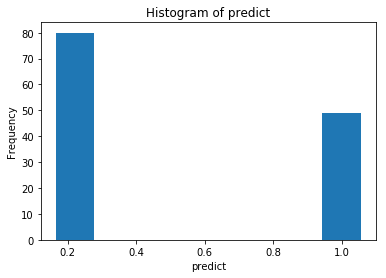

In [88]:
gbm_predictions['predict'].asnumeric().hist()

In [89]:
###: Getting Scorring History

In [90]:
best_model.scoring_history()

,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_lift,training_classification_error
0,,2017-11-23 00:06:46,1 min 24.957 sec,0.0,0.487130,0.667520,0.500000,1.000000,0.612712
1,,2017-11-23 00:06:46,1 min 24.961 sec,1.0,0.251840,0.252756,0.949902,2.582057,0.075424
2,,2017-11-23 00:06:46,1 min 24.965 sec,2.0,0.221615,0.188886,0.965048,2.582057,0.061864
3,,2017-11-23 00:06:46,1 min 24.971 sec,3.0,0.197886,0.139425,0.988156,2.582057,0.050847
4,,2017-11-23 00:06:46,1 min 24.975 sec,4.0,0.190937,0.127495,0.988726,2.582057,0.050000
5,,2017-11-23 00:06:46,1 min 24.982 sec,5.0,0.173597,0.106113,0.992794,2.582057,0.041525
6,,2017-11-23 00:06:46,1 min 24.988 sec,6.0,0.172408,0.102205,0.992815,2.582057,0.041525
7,,2017-11-23 00:06:46,1 min 24.995 sec,7.0,0.156834,0.086669,0.994990,2.582057,0.033051
8,,2017-11-23 00:06:46,1 min 25.003 sec,8.0,0.152822,0.082590,0.995701,2.582057,0.030508
9,,2017-11-23 00:06:46,1 min 25.012 sec,9.0,0.131985,0.064739,0.997898,2.582057,0.021186


In [91]:
###: Getting GBM model variable importance 

In [92]:
best_model.varimp()

[(u'boat', 116.53804779052734, 1.0, 0.43727160020308076),
 (u'sex', 82.8009033203125, 0.7105053232841513, 0.31068379966526805),
 (u'pclass', 19.236738204956055, 0.1650683066146204, 0.07217968257618784),
 (u'fare', 17.893985748291016, 0.15354629743287587, 0.06714143518373182),
 (u'cabin', 11.578004837036133, 0.09934956914541035, 0.0434427450797002),
 (u'age', 8.81291389465332, 0.07562263193643155, 0.033067629278412024),
 (u'embarked', 7.356020927429199, 0.06312119575446608, 0.027601106274287288),
 (u'parch', 1.3821443319320679, 0.011860026473211728, 0.005186052754392193),
 (u'sibsp', 0.8293404579162598, 0.007116478039918494, 0.0031118337403252434),
 (u'body', 0.08371542394161224, 0.000718352722812789, 0.00031411524461458836)]

In [93]:
###: Getting model variable importance PLOT

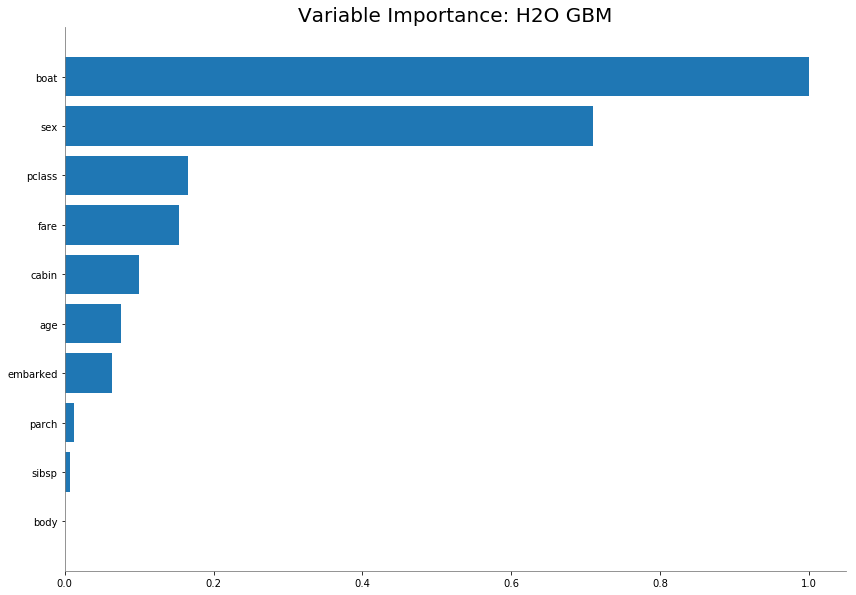

In [94]:
best_model.varimp_plot()